In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/cygage.txt", sep="\t").rename(columns=str.lower)
df

,calage,depth,weight
0,0,0,1.0
1,3707,77,0.1
2,4150,90,0.1
3,5350,107,0.1
4,4500,168,0.1
5,7260,217,0.1
6,7630,282,1.0
7,8960,379,0.5
8,10030,440,0.5
9,11940,514,0.5


In [3]:
import matplotlib.pyplot as plt

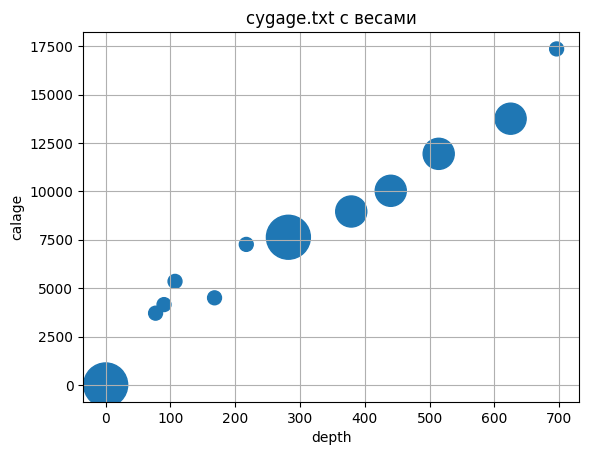

In [4]:
plt.scatter(x=df["depth"], y=df["calage"], s=df["weight"] * 1_000)
plt.grid(True)
plt.title("cygage.txt c весами")
plt.xlabel("depth")
plt.ylabel("calage")
plt.show()

In [5]:
df.shape

(12, 3)

In [6]:
df.describe()

,calage,depth,weight
count,12.000000,12.000000,12.000000
mean,7886.833333,299.583333,0.383333
std,4846.286241,229.582807,0.343335
min,0.000000,0.000000,0.100000
25%,4412.500000,102.750000,0.100000
50%,7445.000000,249.500000,0.300000
75%,10507.500000,458.500000,0.500000
max,17360.000000,696.000000,1.000000


In [7]:
X = df[["depth"]]
y = df["calage"]
weights = df["weight"]

In [8]:
from sklearn.model_selection import LeaveOneOut

In [9]:
loo = LeaveOneOut()
predictions_weighted = []
predictions_unweighted = []

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model_weighted = LinearRegression()

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    weight_train = weights.iloc[train_index]

    model_weighted.fit(X_train, y_train, sample_weight=weight_train)
    pred_weighted = model_weighted.predict(X_test)
    predictions_weighted.append(pred_weighted[0])

In [12]:
model_unweighted = LinearRegression()

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_unweighted.fit(X_train, y_train)
    pred_unweighted = model_unweighted.predict(X_test)
    predictions_unweighted.append(pred_unweighted[0])

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [14]:
np.sqrt(mean_squared_error(y, predictions_weighted)), np.sqrt(
    mean_squared_error(y, predictions_unweighted)
)

(np.float64(1349.905483565451), np.float64(1197.2651009600352))

In [16]:
metrics = [r2_score, mean_absolute_error]
for metric in metrics:
    print(metric.__doc__.split("\n")[0])
    print(metric(y, predictions_unweighted), "\t without weight")
    print(metric(y, predictions_weighted), "\t with weight")
    print()

:math:`R^2` (coefficient of determination) regression score function.
0.933418881858575 	 without weight
0.9153597065439705 	 with weight

Mean absolute error regression loss.
1023.9536048630695 	 without weight
1111.3153393547839 	 with weight

